## 1: Import Libraries
We begin by importing the essential tools required for data analysis and visualization. These tools will help in reading the dataset, cleaning the data, and creating meaningful visual insights throughout the project.

In [2]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2: Load Dataset
The sales dataset is loaded into the analysis environment. This allows us to begin exploring and understanding the structure and content of the data we're working with.

In [3]:
# Loading the dataset from an Excel file
df = pd.read_excel("Online Retail.xlsx")

## 3: View Initial Records
We take an initial look at the dataset to understand what kind of information it contains. This helps in identifying key fields and forming a first impression of the data quality.

In [4]:
# Display the first few rows to understand structure
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 4: Check Shape and Structure
We examine the size of the dataset and check the structure of the columns. This helps confirm how much data is available and what kind of data we are dealing with.

In [5]:
# Display the first few rows to understand structure
df.head()
# View dataset shape (rows, columns) and column data types
print("Shape:", df.shape)
df.info()

Shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 5: Check for Missing Values
A check is performed to identify any gaps or missing entries in the dataset. Detecting these early ensures we can clean or address them before proceeding with deeper analysis.

In [6]:
# Check for missing values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 6: Remove Duplicates
We identify and eliminate any duplicate entries to ensure that repeated data does not skew the results or lead to inaccurate insights.

In [7]:
# Check and remove duplicate rows
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 5268


## 7. Clean Data
To ensure accurate analysis, we removed missing entries and filtered out records with invalid or zero values in Quantity and UnitPrice. A new Revenue column was created to calculate sales per transaction.

In [8]:
# Step 3: Clean Data
df.dropna(inplace=True)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

## 8: Summary Statistics
Key statistical summaries are generated to understand the distribution and range of values in numerical fields. This provides a snapshot of the data's central tendency and spread.

In [9]:
# Basic descriptive statistics for numerical features
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


## 9: Analyze Categorical Columns
We explore the distribution of values in important categorical fields. This helps us understand how the data is grouped and identify categories that occur most frequently.

In [10]:
# Categorical columns info
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Numerical columns info
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

# Unique counts in categorical columns
print("\nUnique values in categorical columns:")
print(df[categorical_cols].nunique())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df[numerical_cols].describe())

Categorical columns: ['InvoiceNo', 'StockCode', 'Description', 'Country']
Numerical columns: ['Quantity', 'UnitPrice', 'CustomerID', 'Revenue']

Unique values in categorical columns:
InvoiceNo      18532
StockCode       3665
Description     3877
Country           37
dtype: int64

Summary statistics for numerical columns:
            Quantity      UnitPrice     CustomerID        Revenue
count  392692.000000  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865      22.631500
std       180.492832      22.241836    1713.539549     311.099224
min         1.000000       0.001000   12346.000000       0.001000
25%         2.000000       1.250000   13955.000000       4.950000
50%         6.000000       1.950000   15150.000000      12.450000
75%        12.000000       3.750000   16791.000000      19.800000
max     80995.000000    8142.750000   18287.000000  168469.600000


## 10: Visualize Distributions
We use visual methods to examine how values are spread across different fields. These visuals help in identifying patterns, outliers, or unusual distributions that may need attention.

### (i) Revenue Distribution
This plot helps us understand how revenue is spread across transactions. It highlights common revenue ranges and reveals potential outliers or skewness in sales values.

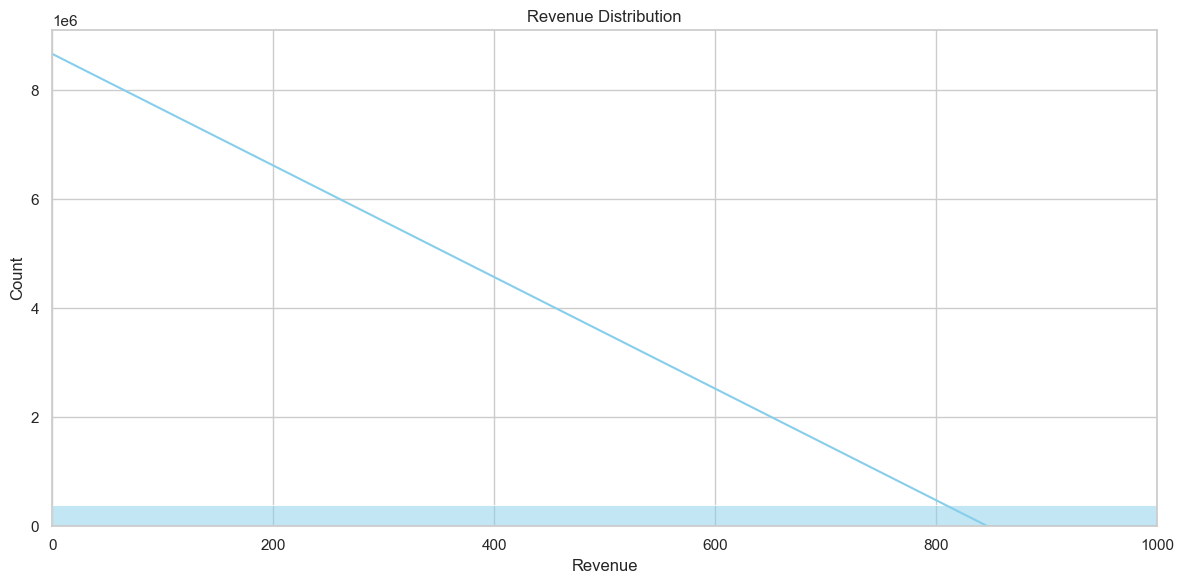

In [11]:
# Revenue Distribution
sns.set(style='whitegrid', palette='Set2')

plt.figure(figsize=(12,6))
sns.histplot(df['Revenue'], bins=100, kde=True, color='skyblue')
plt.title('Revenue Distribution')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

### (ii) BoxPlot for UnitPrice
This visualization shows how product prices vary, highlights the median price, and detects pricing outliers that may indicate premium or incorrectly recorded items.

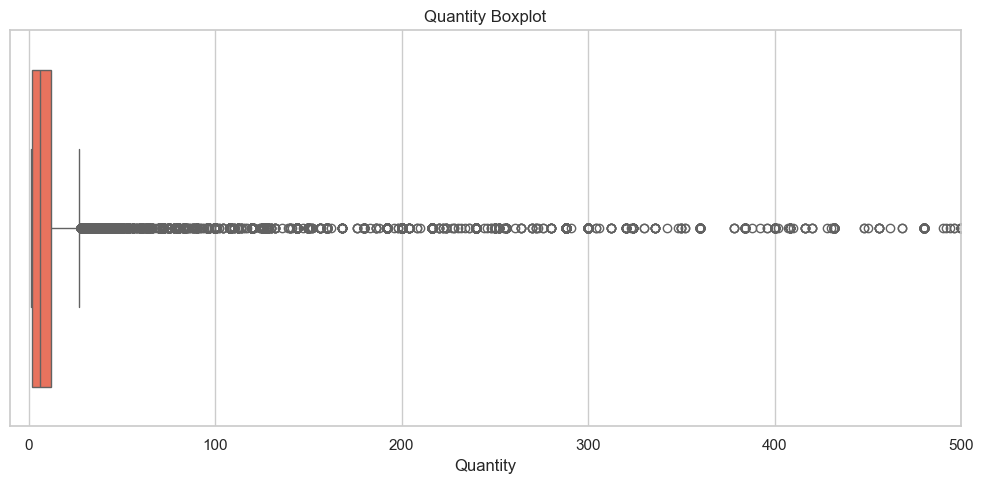

In [12]:
# Boxplot for UnitPrice to check outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Quantity'], color='tomato')
plt.title('Quantity Boxplot')
plt.xlim(-10, 500)
plt.tight_layout()
plt.show()

## 11: Correlation Heatmap
Relationships between numerical variables are analyzed to see how they influence each other. Understanding these correlations supports better feature selection and deeper insights.

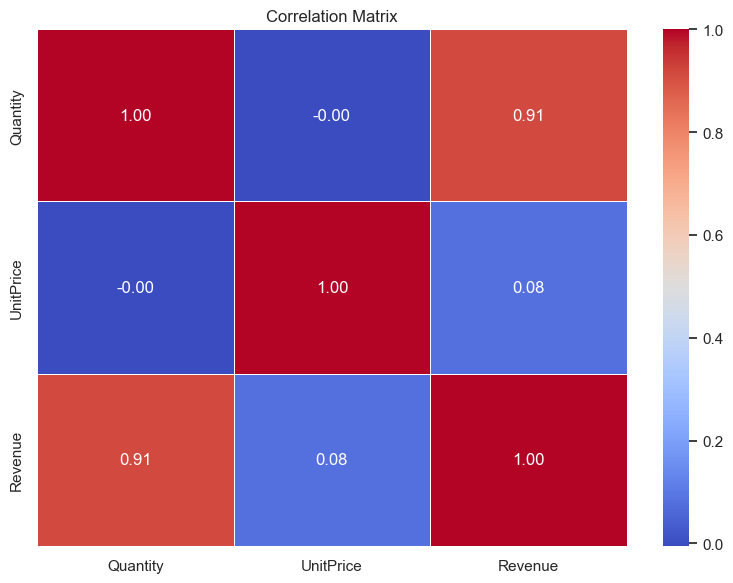

In [13]:
# Compute correlation matrix and plot heatmap
plt.figure(figsize=(8,6))
corr = df[['Quantity', 'UnitPrice', 'Revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 12: Visualizations

### (a) Top Selling Countries
This bar chart displays the countries generating the highest revenue, helping identify key international markets and potential areas for strategic focus.

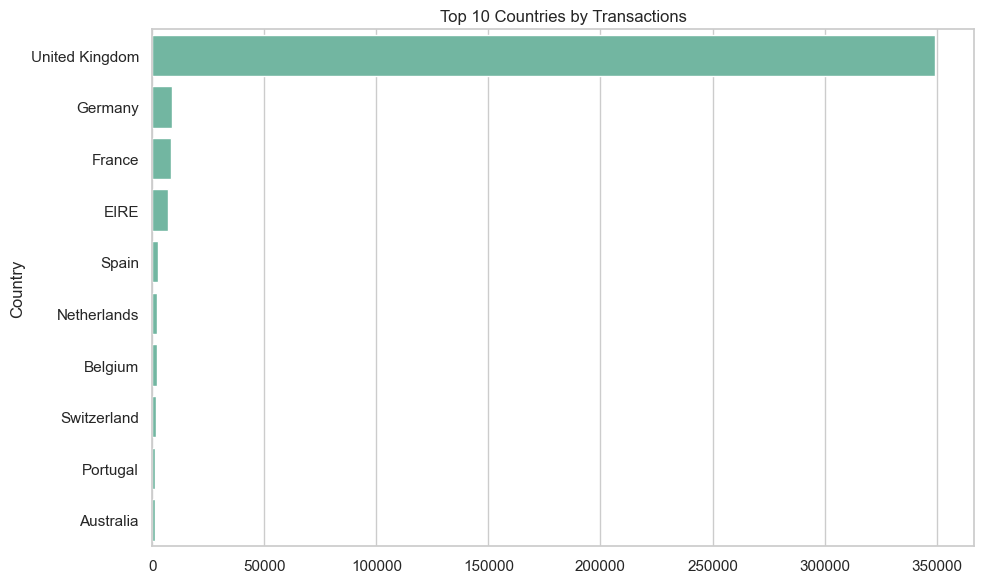

In [14]:
# Top-Selling Countries

top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Transactions')
plt.tight_layout()
plt.show()

### (b) Most Sold Products
This visualization highlights the products with the highest total quantity sold, giving insights into customer preferences and high-demand inventory items.

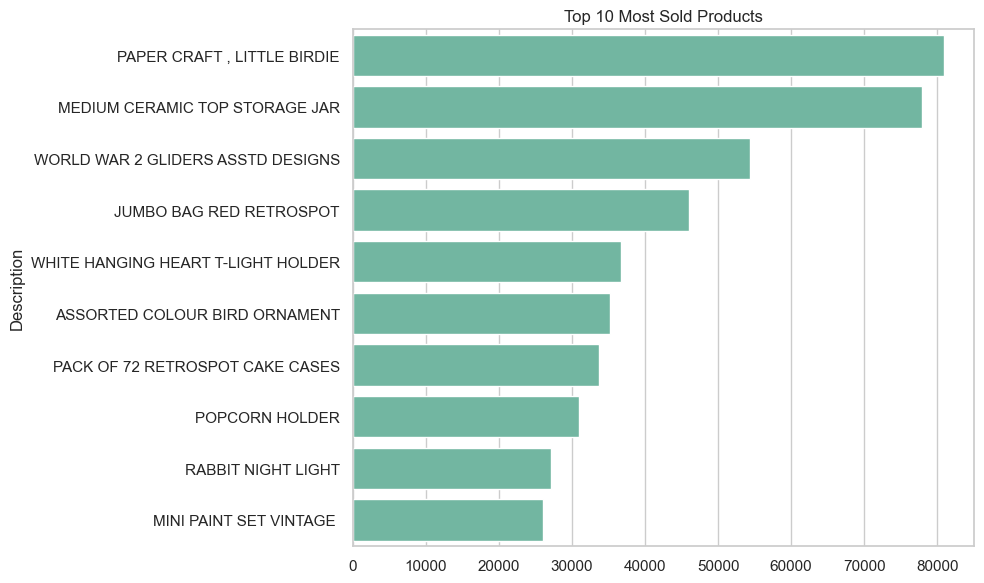

In [15]:
# Most Sold Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Sold Products')
plt.tight_layout()
plt.show()

### (c): Monthly Sales revenue Trend
This time-series plot reveals how revenue fluctuates month-to-month, helping identify seasonal trends, growth patterns, and periods of high or low performance.

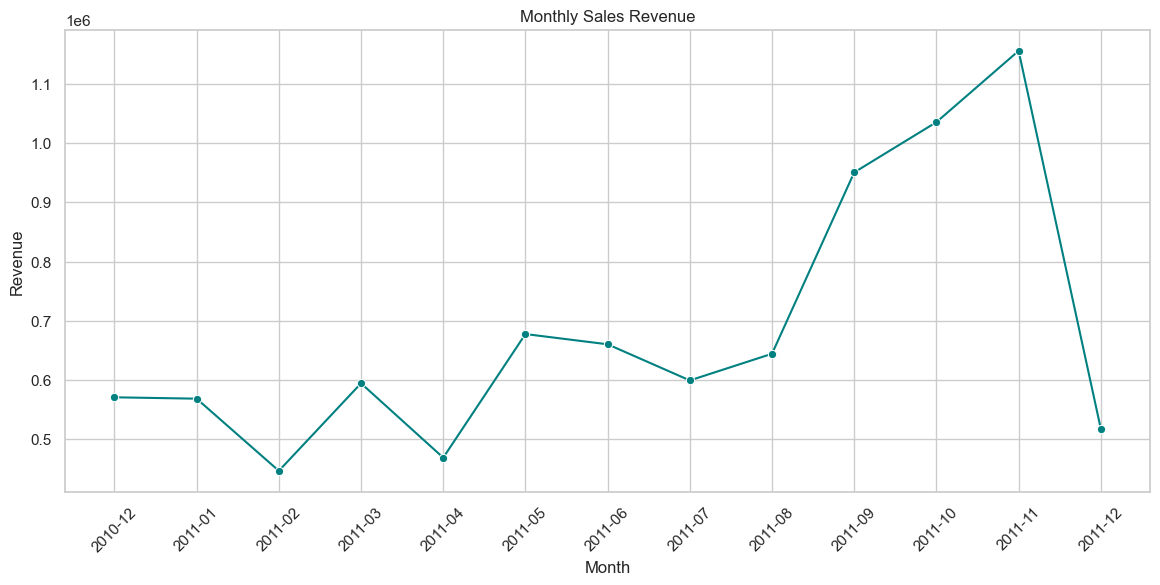

In [16]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a 'Month' column for monthly grouping
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and calculate total Revenue
monthly_sales = df.groupby('Month')['Revenue'].sum()

# Convert to DataFrame for seaborn plotting
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Month'] = monthly_sales_df['Month'].astype(str)  # For seaborn compatibility

# Plot with seaborn
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales_df, x='Month', y='Revenue', marker='o', color='teal')
plt.title("Monthly Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### (d): Revenue by Country
This chart ranks countries based on total revenue generated, offering a clear view of where most sales are coming from and guiding regional business strategies.

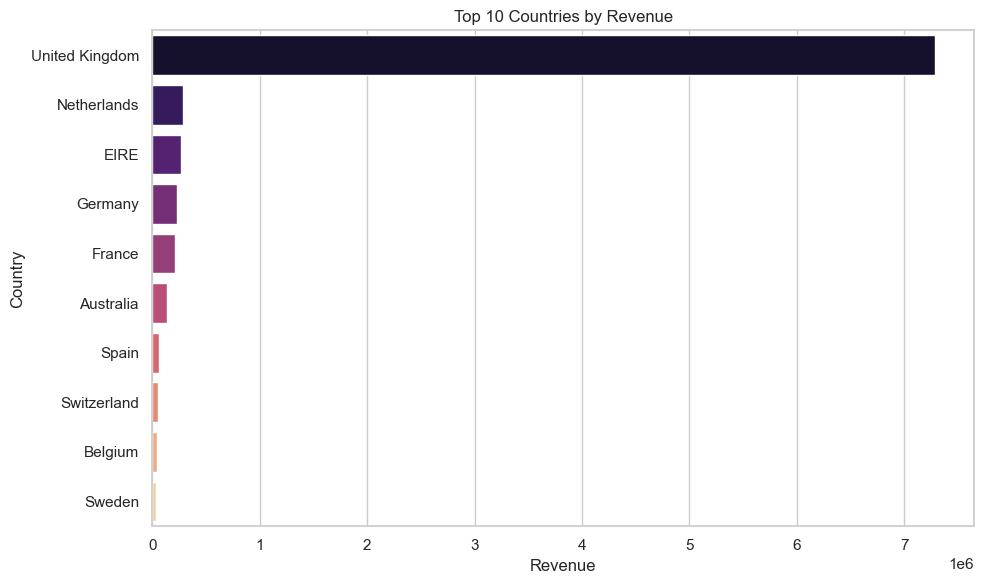

In [17]:
# Revenue by Country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=country_revenue.values,
    y=country_revenue.index,
    hue=country_revenue.index,         
    palette='magma',
    dodge=False,                       
    legend=False                       
)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### (e) Top Customers by Revenue
This visualization highlights the highest spending customers, helping identify loyal or high-value clients who contribute significantly to overall sales.

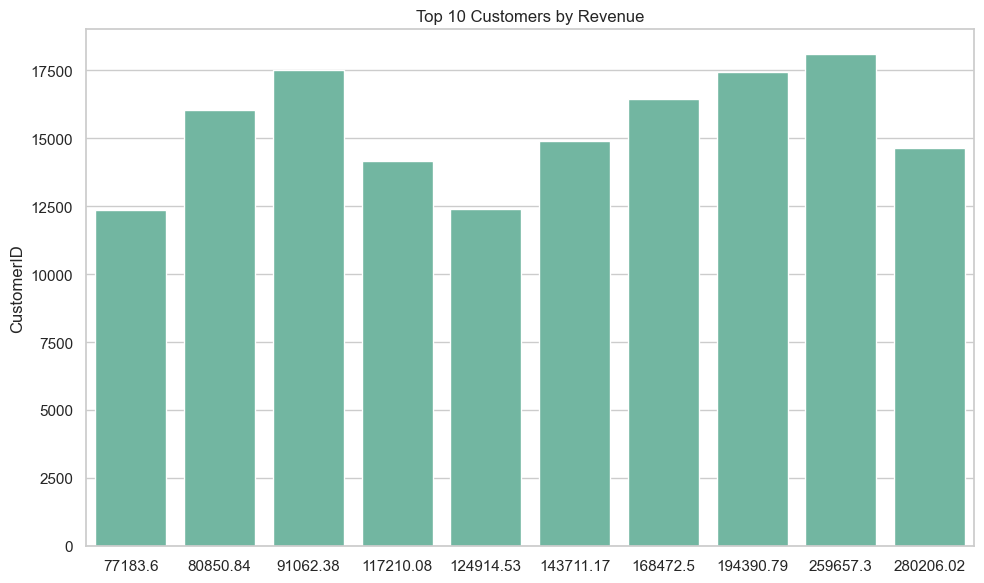

In [18]:
# Top Customers by Revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Revenue')
plt.tight_layout()
plt.show()

## Insights and Observations

### (i) Revenue Distribution:
Most sales come from a small number of transactions with high revenue, while many transactions have low revenue. This means a few big purchases heavily impact overall sales.

### (ii) Top-Selling Countries:
A handful of countries dominate the sales, showing where the business is strongest internationally. Focusing marketing and sales efforts on these regions could improve growth.

### (iii) Top Customers:
A small group of customers contribute a large portion of revenue. Building strong relationships with these customers can increase loyalty and future sales.

### (iv) Popular Products:
Certain products are sold much more than others, highlighting customer preferences and helping to optimize stock and promotions.

### (v) Monthly Sales Trends:
Sales rise and fall throughout the year, showing clear seasonal patterns. Planning inventory and marketing around these trends can boost sales during peak months.

### (vi) Pricing Outliers:
Some products have unusually high or low prices, which may represent premium items or data entry errors. Reviewing these can improve pricing strategies.

Overall, these insights can help the company focus resources effectively — whether it’s targeting top customers, expanding in profitable countries, or managing inventory better to match demand cycles.